# Bank Loan Prediction – Numerical ML Project
## Linear Regression & KNN Regressor


## Importing Required Libraries

In this cell, we import the necessary libraries for:
- Data handling (`pandas`, `numpy`)
- Data visualization (`matplotlib`, `seaborn`)

These libraries will be used throughout the notebook for data loading,
exploration, and visualization.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load Dataset

## Dataset Overview

This dataset represents customer information from a bank and is used to predict whether a customer will take a personal loan.

- Number of samples: 5000
- Target variable: `Personal.Loan`
  - 0 → Customer did not take a loan
  - 1 → Customer took a loan
- Feature types:
  - Numerical: Age, Experience, Income, CCAvg, Mortgage
  - Categorical: Education, Family
  - Binary: Online, CreditCard, CD.Account, Securities.Account

Although the target variable is binary, regression models are used as required, and their outputs are later converted to class labels for accuracy evaluation.


In [4]:
df = pd.read_csv('bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 3. Data Cleaning & Preprocessing

In [5]:
df = df.drop(columns=['ID', 'ZIP.Code'])
df.isna().sum()

,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0
Securities.Account,0
CD.Account,0


## Data Cleaning and Preprocessing

Data cleaning is performed to improve data quality and remove irrelevant information.

Steps applied:
- Removed `ID` column because it is only an identifier.
- Removed `ZIP.Code` because it represents a location code and has no numerical meaning.
- Checked for missing values and found none, so no imputation was required.

This ensures that the model learns only from meaningful and clean data.


In [6]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 4. Feature / Target Split

In [7]:
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

## 5. Encoding

## Encoding of Categorical Features

Encoding is required because machine learning models work with numerical values.

- **Education** was encoded using *Ordinal Encoding* because it has a natural order (1 < 2 < 3).

- **Family** was encoded using *One-Hot Encoding* because its values represent categories without a strict mathematical relationship.
- Binary features such as `Online` and `CreditCard` were already represented as 0 and 1, so no encoding was needed.

Proper encoding prevents misleading numerical relationships and improves model performance.


In [8]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for Education
ord_enc = OrdinalEncoder()
X[['Education']] = ord_enc.fit_transform(X[['Education']])

# One-hot encoding for Family
X = pd.get_dummies(X, columns=['Family'], drop_first=True)

X.head()

,Age,Experience,Income,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Family_2,Family_3,Family_4
0,25,1,49,1.6,0.0,0,1,0,0,0,False,False,True
1,45,19,34,1.5,0.0,0,1,0,0,0,False,True,False
2,39,15,11,1.0,0.0,0,0,0,0,0,False,False,False
3,35,9,100,2.7,1.0,0,0,0,0,0,False,False,False
4,35,8,45,1.0,1.0,0,0,0,0,1,False,False,True


## 6. Feature Extraction (Polynomial Features)
## Feature Extraction using Polynomial Features

Polynomial feature extraction is used to create new features from existing ones.

Using `PolynomialFeatures(degree=2)` generates:
- Original features
- Squared features (e.g., Income², Age²)
- Interaction features (e.g., Age × Income)

This allows linear regression models to capture non-linear relationships and interactions between features that cannot be learned using only the original features.


In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

## 7. Train / Test Split

## Train–Test Split

The dataset is split into training and testing sets:

- Training set (80%): Used to train the models
- Testing set (20%): Used to evaluate model performance on unseen data

This helps measure how well the model generalizes to new data and prevents overfitting.


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

## 8. Standardization

## Feature Scaling

Feature scaling is applied using StandardScaler.

- All features are transformed to have a mean of 0 and a standard deviation of 1.
- Scaling is especially important for KNN because it relies on distance calculations.
- It also improves numerical stability for regression models.

Without scaling, features with larger values could dominate the learning process.




In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 9. Linear Regression
## Linear Regression Model

Linear Regression is used as a baseline regression model.

It learns a linear relationship between input features and the target variable by minimizing the Mean Squared Error (MSE).

Although the target variable is binary, regression outputs are used to:
- Evaluate regression metrics (R², MSE, MAE, RMSE)
- Convert predictions into class labels to compute accuracy




In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)
lr_acc = accuracy_score(y_test, y_pred_lr_class)

print('Linear Regression')
print('R2:', lr_r2)
print('MSE:', lr_mse)
print('MAE:', lr_mae)
print('RMSE:', lr_rmse)
print('Accuracy:', lr_acc)

Linear Regression
R2: 0.6674797026286963
MSE: 0.03124859494546827
MAE: 0.11317749006213432
RMSE: 0.17677272115761603
Accuracy: 0.972


## Linear Regression Results

- R² score shows how much variance in the target variable is explained by the model.
- MAE, MSE, and RMSE measure prediction error.
- Accuracy is calculated after converting regression outputs into class labels using a threshold of 0.5.
- Confusion matrix and plots help visualize prediction quality and model fit.

Linear Regression serves as a baseline for comparison with more advanced models.


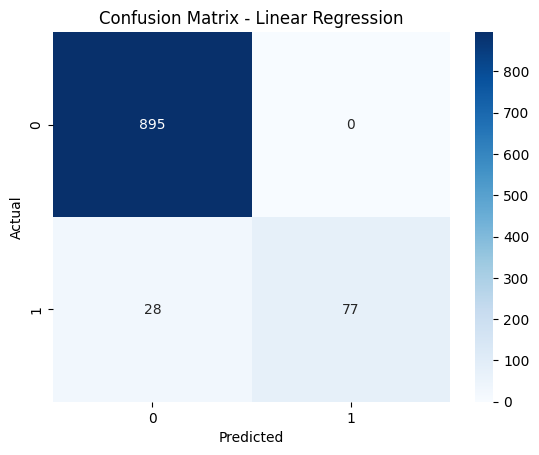

In [13]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr_class)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

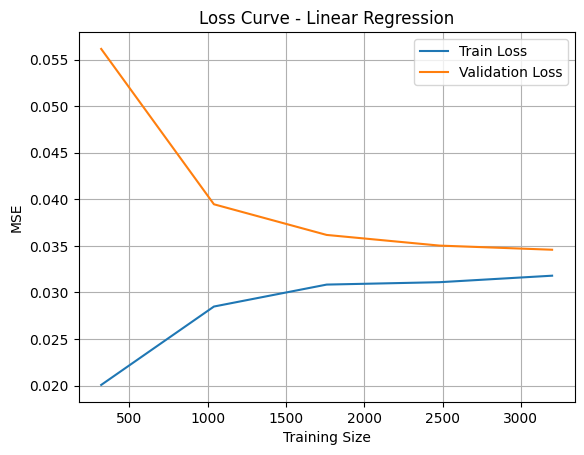

In [14]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)

plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train Loss')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Loss')
plt.legend()
plt.title('Loss Curve - Linear Regression')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

## 10. Ridge Regression (Regularization)
## Ridge Regression (Regularization)

Ridge Regression is a linear regression model that includes L2 regularization.

Regularization:
- Penalizes large coefficients
- Reduces overfitting
- Handles multicollinearity introduced by polynomial features

Ridge regression improves generalization while keeping the model simple.


In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print('Ridge R2:', r2_score(y_test, y_pred_ridge))

Ridge R2: 0.6673434064142095


## 11. KNN Regressor
## K-Nearest Neighbors (KNN) Regression

KNN Regression is a non-parametric, distance-based algorithm.

It predicts a value by averaging the outputs of the K nearest neighbors.

Key characteristics:
- Does not assume a specific model form
- Naturally captures non-linear patterns
- Highly sensitive to feature scaling

This model is used to compare performance with linear-based models.


In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)

y_pred_knn_class = (y_pred_knn >= 0.5).astype(int)
knn_acc = accuracy_score(y_test, y_pred_knn_class)

print('KNN Regression')
print('R2:', knn_r2)
print('MSE:', knn_mse)
print('MAE:', knn_mae)
print('RMSE:', knn_rmse)
print('Accuracy:', knn_acc)

KNN Regression
R2: 0.6156163981953515
MSE: 0.03612244897959184
MAE: 0.059142857142857136
RMSE: 0.1900590670807153
Accuracy: 0.947


## KNN Regression Results

- KNN achieved higher performance due to its ability to capture local and non-linear patterns.
- Regression metrics and accuracy show improved prediction quality.
- Learning curves help analyze underfitting or overfitting behavior.

KNN provides a strong comparison to linear and regularized regression models.


#Confusion Matrix

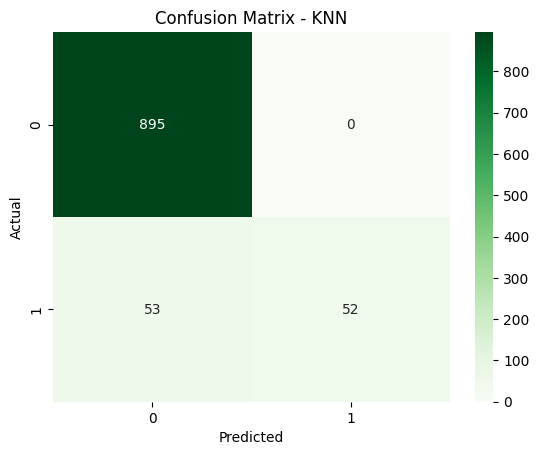

In [17]:
cm_knn = confusion_matrix(y_test, y_pred_knn_class)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

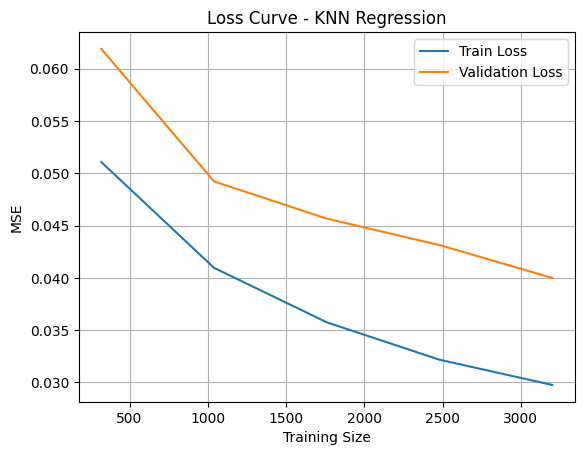

In [18]:
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)

plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train Loss')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Loss')
plt.legend()
plt.title('Loss Curve - KNN Regression')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

## Final Results Comparison

The table below compares the performance of the two regression models used in this project:
- Linear Regression
- KNN Regression

Ridge Regression is excluded from this comparison table to focus on the baseline linear model and the non-linear, distance-based model.

Both regression and classification-based evaluation metrics are reported to provide a complete assessment.


In [19]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "KNN Regression"],
    "R² Score": [lr_r2, knn_r2],
    "MSE": [lr_mse, knn_mse],
    "MAE": [lr_mae, knn_mae],
    "RMSE": [lr_rmse, knn_rmse],
    "Accuracy": [lr_acc, knn_acc]
})

results_df


,Model,R² Score,MSE,MAE,RMSE,Accuracy
0,Linear Regression,0.667480,0.031249,0.113177,0.176773,0.972
1,KNN Regression,0.615616,0.036122,0.059143,0.190059,0.947


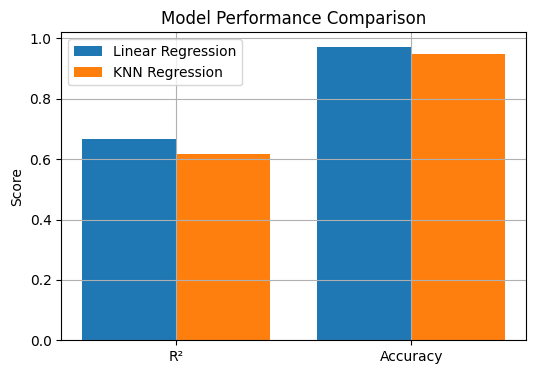

In [20]:
metrics = ["R²", "Accuracy"]
lr_values = [lr_r2, lr_acc]
knn_values = [knn_r2, knn_acc]

x = range(len(metrics))

plt.figure(figsize=(6,4))
plt.bar(x, lr_values, width=0.4, label="Linear Regression")
plt.bar([i + 0.4 for i in x], knn_values, width=0.4, label="KNN Regression")

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

This project demonstrates a complete machine learning pipeline including:

- Data cleaning and preprocessing
- Encoding of categorical features
- Feature extraction using polynomial features
- Feature scaling
- Regression modeling using Linear Regression, Ridge Regression, and KNN
- Model evaluation using multiple metrics and visualizations

The results show that KNN regression performs better due to its ability to model non-linear relationships, while Ridge Regression improves stability and generalization compared to standard Linear Regression.
